## Air Crashes Dataset – Exploratory and Descriptive Analysis
In this notebook, we carry out an in-depth exploratory and descriptive analysis of the Air Crashes Dataset, a historical record of aircraft accidents involving various aircraft models, operators, and global locations.

This phase of analysis is essential for uncovering trends, identifying critical safety factors, and understanding the dataset’s structure before proceeding to modeling or further statistical inference. We examine the distribution of crashes over time, affected regions, aircraft manufacturers, and casualty data. Particular focus is placed on the relationship between crash frequency and time, geographical hotspots, and aircraft types, helping to build a strong foundation for downstream risk assessment and safety policy development.

We begin our analysis by importing the core Python libraries required for **data handling**, **numerical computation**, **visualization**, and **directory management**:

- `pandas`: Enables efficient manipulation, filtering, and aggregation of structured tabular data, forming the backbone of our analysis pipeline.

- `numpy`: Provides support for fast numerical operations, array-based computation, and statistical routines.

- `os`: Facilitates interaction with the file system, allowing us to construct flexible and portable directory paths for data and output management.

- `plotly.express`: A high-level graphing library that enables the creation of interactive, publication-quality visualizations, which we use extensively to uncover patterns and present insights throughout the notebook.


In [99]:
# Import Libararies
import pandas as pd
import numpy as np
import os
import plotly.express as px


## Define and Create Directory Paths

To ensure reproducibility and organized storage, we programmatically create directories if they don't already exist for:

- **raw data**
- **processed data**
- **results**
- **documentation**
  
These directories will store intermediate and final outputs for reproducibility


In [100]:
# Get working directory
current_dir= os.getcwd()
# Go one directory up to the root directory
project_root_dir= os.path.dirname(current_dir)
project_root_dir
# Define paths to docs folder
data_dir= os.path.join(project_root_dir,'Data')
raw_dir= os.path.join(data_dir,'Raw')
processed_dir=os.path.join(data_dir,'Processed')
results_dir=os.path.join(project_root_dir,'Results')
docs_dir=os.path.join(project_root_dir,'Docs')
notebook_dir= os.path.join(project_root_dir,'Notebooks')

## Loading the Cleaned Dataset
We load the cleaned version of the Air Crashes Dataset from the processed data directory into a Pandas DataFrame. The head(10) function shows the first ten records, giving a glimpse into columns such as Year, Country/Region, Aircraft Manufacturer, Operator, and Fatalities.

In [101]:
df = pd.read_csv(r"C:\Users\user\Documents\Tekher\NEW CRASHES\Aircrashes_report\Data\processed\Aircrash_file cleaned.csv"
                         , header=0)
df.head(10)

,Year,Quarter,Month,Day,Country/Region,Aircraft Manufacturer,Aircraft,Location,Operator,Sum of Ground,Sum of Fatalities (air),Sum of Aboard,Month_num,Date
0,1908,Qtr 3,September,17,United States,Wright,Wright Flyer III,virginia,Army U.S. - Military,0,1,2,9,1908-09-17
1,1909,Qtr 3,September,7,France,Wright,Wright ByplaneSC1,france,Unknown,0,1,1,9,1909-09-07
2,1912,Qtr 3,July,12,Unknown,Unknown,Dirigible,atlantic,Navy U.S. - JerseyMilitary,0,5,5,7,1912-07-12
3,1913,Qtr 3,August,6,United Kingdom,Curtiss,Curtiss seaplane,victoria british,Canada Columbia Private,0,1,1,8,1913-08-06
4,1913,Qtr 3,September,9,Unknown,Zeppelin,Zeppelin L 1 (airship),over the north seamilitary - german navy,Unknown,0,14,20,9,1913-09-09
5,1913,Qtr 4,October,17,Unknown,Zeppelin,Zeppelin L 2 (airship),near johannisthal germany,Navy German - Military,0,28,28,10,1913-10-17
6,1915,Qtr 1,March,5,Unknown,Zeppelin,Zeppelin L 8 (airship),tienen belgium,Navy German - Military,0,17,41,3,1915-03-05
7,1915,Qtr 3,September,3,Unknown,Zeppelin,Zeppelin L 10 (airship),off cuxhaven germany,Navy German - Military,0,19,19,9,1915-09-03
8,1916,Qtr 3,July,28,Bulgaria,Schütte-Lanz,Schutte Lanz S,near jambol bulgeria,Army German - Military,0,20,20,7,1916-07-28
9,1916,Qtr 3,September,24,Unknown,Zeppelin,Zeppelin L 32 (airship),billericay england,Navy German - Military,0,22,22,9,1916-09-24


## Dataset Dimensions and Data Types
Here, we examine the structure of the dataset:

There are 5,030 entries and 14 variables.
The dataset includes both numerical (e.g., Year, Fatalities) and categorical variables (e.g., Country/Region, Aircraft Manufacturer, Operator).

Understanding data types and null entries is essential before proceeding with analysis.

In [102]:
df.shape

(5030, 14)

In [103]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5030 entries, 0 to 5029
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Year                     5030 non-null   int64 
 1   Quarter                  5030 non-null   object
 2   Month                    5030 non-null   object
 3   Day                      5030 non-null   int64 
 4   Country/Region           5030 non-null   object
 5   Aircraft Manufacturer    5030 non-null   object
 6   Aircraft                 5020 non-null   object
 7   Location                 5030 non-null   object
 8   Operator                 5030 non-null   object
 9   Sum of Ground            5030 non-null   int64 
 10  Sum of Fatalities (air)  5030 non-null   int64 
 11  Sum of Aboard            5030 non-null   int64 
 12  Month_num                5030 non-null   int64 
 13  Date                     5030 non-null   object
dtypes: int64(6), object(8)
memory usage: 550

## Summary Statistics: Numerical Variables

In [104]:
df.describe()

,Year,Day,Sum of Ground,Sum of Fatalities (air),Sum of Aboard,Month_num
count,5030.000000,5030.000000,5030.000000,5030.000000,5030.000000,5030.000000
mean,1970.938370,15.783499,1.706163,22.237972,31.013519,6.694433
std,24.770415,8.795157,55.132476,34.960979,45.399504,3.530774
min,1908.000000,1.000000,0.000000,0.000000,0.000000,1.000000
25%,1951.000000,8.000000,0.000000,4.000000,7.000000,4.000000
50%,1970.000000,16.000000,0.000000,11.000000,16.000000,7.000000
75%,1992.000000,23.000000,0.000000,25.000000,34.000000,10.000000
max,2023.000000,31.000000,2750.000000,583.000000,644.000000,12.000000


## This summary provides a snapshot of key distribution characteristics. We observe that:

Year ranges from 1908 to 2023, with a mean around 1970.9. The data spans over a century, reflecting a wide historical coverage of air crash incidents globally. The median year is 1970, showing a relatively balanced distribution across time with slightly more recent records.

Sum of Fatalities (air) shows a wide range, with the maximum reaching 583. The median is 11, and the mean is around 22.2. This indicates a highly skewed distribution where most crashes involve a small number of fatalities, but a few major accidents result in high fatality counts.

Sum of Ground fatalities is mostly 0, with a very high standard deviation due to rare but extremely deadly incidents (max = 2750). The 25th, 50th, and 75th percentiles are all 0, showing that in most cases, no fatalities occurred on the ground.

Sum of Aboard ranges from 0 to 644, with a mean of 31 and median of 16. This implies that most aircraft involved were small to mid-sized, though large passenger aircraft are also present in the dataset.

Day of the month ranges from 1 to 31 with no significant skew, indicating a fairly uniform distribution of accidents throughout the month.

Month_num ranges from 1 (January) to 12 (December), with a median of 7, suggesting crashes are relatively balanced across months, though further analysis could reveal seasonal trends.

## Summary Statistics: Categorical Variables

In [105]:
df.describe(include='object')

,Quarter,Month,Country/Region,Aircraft Manufacturer,Aircraft,Location,Operator,Date
count,5030,5030,5030,5030,5020,5030,5030,5030
unique,4,12,60,285,3510,4165,2625,4598
top,Qtr 4,December,Unknown,Douglas,Boeing B 737,moscow russia,Unknown,2001-09-11
freq,1368,497,3547,995,73,16,234,4


In [106]:
df['Year'].value_counts(normalize=True)

Year
1946    0.017495
1989    0.016501
1947    0.016302
1962    0.015706
1948    0.015507
          ...   
2023    0.000398
1915    0.000398
1909    0.000199
1912    0.000199
1908    0.000199
Name: proportion, Length: 113, dtype: float64

In [107]:
df['Quarter'].value_counts(normalize=True)

Quarter
Qtr 4    0.271968
Qtr 3    0.265010
Qtr 1    0.249105
Qtr 2    0.213917
Name: proportion, dtype: float64

In [108]:
df['Month'].value_counts(normalize=True)

Month
December     0.098807
January      0.092247
September    0.090060
August       0.089861
November     0.088072
July         0.085089
October      0.085089
March        0.084891
June         0.072962
February     0.071968
May          0.071571
April        0.069384
Name: proportion, dtype: float64

In [109]:
df['Day'].value_counts(normalize=True)

Day
8     0.036779
15    0.036183
24    0.035388
27    0.035189
10    0.034990
14    0.034592
9     0.034394
2     0.034394
11    0.034195
3     0.034195
21    0.034195
22    0.033400
6     0.033002
17    0.032803
12    0.032803
18    0.032406
4     0.032207
20    0.031610
29    0.031213
26    0.031213
16    0.031014
19    0.031014
23    0.030815
28    0.030417
25    0.030417
13    0.030417
5     0.029821
30    0.029821
7     0.029026
1     0.029026
31    0.023062
Name: proportion, dtype: float64

In [110]:
df['Country/Region'].value_counts(normalize=True)

Country/Region
Unknown                     0.705169
United States               0.161630
Brazil                      0.032803
India                       0.023658
China                       0.018091
Canada                      0.014911
Spain                       0.012525
United Kingdom              0.008946
Serbia                      0.002386
Portugal                    0.001590
Italy                       0.001392
France                      0.001392
Japan                       0.001392
Indonesia                   0.001193
Australia                   0.000994
Philippines                 0.000795
Mexico                      0.000795
Malaysia                    0.000398
Colombia                    0.000398
Argentina                   0.000398
Cameroon                    0.000398
Zimbabwe                    0.000398
Sweden                      0.000398
Netherlands                 0.000398
Bulgaria                    0.000398
Germany                     0.000398
Croatia                

In [111]:
df['Aircraft Manufacturer'].value_counts(normalize=True)

Aircraft Manufacturer
Douglas                0.197813
Boeing                 0.080915
Lockheed               0.065408
De Havilland           0.058648
Antonov                0.057256
                         ...   
Volpar                 0.000199
Britten-Norman         0.000199
Cant                   0.000199
De Havilland Canada    0.000199
Socata                 0.000199
Name: proportion, Length: 285, dtype: float64

In [112]:
df['Aircraft'].value_counts(normalize=True)

Aircraft
Boeing B 737                       0.014542
Boeing B 727                       0.011355
Boeing B 707                       0.010159
McDonnell Douglas DC 9             0.008367
Douglas C 47A                      0.007968
                                     ...   
Lockheed 18 LodestarN300E          0.000199
Douglas DC 7                       0.000199
Douglas C 124C / Fairchild C       0.000199
Junkers JU 52/3mHC                 0.000199
Embraer EMB 110P1 BandeirantePT    0.000199
Name: proportion, Length: 3510, dtype: float64

In [113]:
df['Location'].value_counts(normalize=True)

Location
moscow russia                        0.003181
manila philippines                   0.002982
new york new                         0.002982
cairo egypt                          0.002584
sao paulo brazil                     0.002584
                                       ...   
nantucket massachusetts              0.000199
near chita russia                    0.000199
off guammilitary - u.s. air force    0.000199
sasnashen russia                     0.000199
brazil                               0.000199
Name: proportion, Length: 4165, dtype: float64

In [114]:
df['Operator'].value_counts(normalize=True)

Operator
Unknown                                    0.046521
Aeroflot                                   0.037376
Force Air U.S. - Military                  0.018290
France Air                                 0.011332
Lufthansa Deutsche                         0.011332
                                             ...   
Airlines SamoaPolynesian                   0.000199
Air Laos                                   0.000199
New York          Falls Mohawk Airlines    0.000199
Canada Austin Airways                      0.000199
Aerotaxi Manaus                            0.000199
Name: proportion, Length: 2625, dtype: float64

In [115]:
df['Sum of Ground'].value_counts(normalize=True)

Sum of Ground
0       0.949901
1       0.012326
2       0.007157
3       0.004374
4       0.003181
5       0.002386
7       0.001988
8       0.001789
6       0.001193
10      0.001193
14      0.000994
11      0.000795
13      0.000795
12      0.000795
19      0.000795
44      0.000795
22      0.000795
24      0.000596
20      0.000596
35      0.000398
25      0.000398
125     0.000398
15      0.000398
30      0.000398
37      0.000398
2750    0.000398
32      0.000199
45      0.000199
39      0.000199
18      0.000199
225     0.000199
49      0.000199
9       0.000199
78      0.000199
40      0.000199
50      0.000199
31      0.000199
113     0.000199
71      0.000199
33      0.000199
23      0.000199
87      0.000199
17      0.000199
29      0.000199
16      0.000199
36      0.000199
58      0.000199
63      0.000199
53      0.000199
85      0.000199
Name: proportion, dtype: float64

In [116]:
df['Sum of Fatalities (air)'].value_counts(normalize=True)

Sum of Fatalities (air)
1      0.076342
2      0.075149
3      0.072565
4      0.048708
5      0.046918
         ...   
259    0.000199
144    0.000199
171    0.000199
223    0.000199
224    0.000199
Name: proportion, Length: 199, dtype: float64

In [117]:
df['Sum of Aboard'].value_counts(normalize=True)

Sum of Aboard
3      0.055666
2      0.048907
4      0.040557
5      0.037972
10     0.035785
         ...   
356    0.000199
258    0.000199
259    0.000199
290    0.000199
190    0.000199
Name: proportion, Length: 244, dtype: float64

Year

Accidents span over a century, with noticeable peaks in the mid-1900s. The year 1946 holds the highest share of crashes (~1.75%), followed closely by 1989 and 1947. Earlier years (like 1908–1915) represent a very small fraction, reflecting limited aviation activity at the time.

Quarter

Crashes are slightly more common in the fourth quarter (27.2%) and third quarter (26.5%), suggesting seasonal patterns — possibly linked to weather conditions or travel demand. The second quarter has the fewest incidents (21.4%).

Month

December has the highest occurrence of air crashes (9.9%), followed by January and September. April and May see the least, each under 7.2%. This distribution may align with operational pressures or climatic changes across months.

Day of the Month

Crashes are relatively well spread across the month. The 8th, 15th, and 24th show slightly higher frequencies (~3.5% each), while the 31st records the fewest, likely due to fewer months including that date.

Country/Region

A significant majority of incidents (~70.5%) have unknown locations. Among known countries, the United States dominates (16.2%), followed by Brazil (3.3%) and India (2.4%). Other nations appear in much smaller proportions, reflecting either data incompleteness or global aviation distribution.

Aircraft Manufacturer

Douglas aircraft are most commonly involved (19.8%), followed by Boeing (8.1%), Lockheed (6.5%), and De Havilland (5.9%). Over 280 manufacturers appear, but most contribute marginally to the total crash count.

Aircraft

The Boeing 737 is the most frequently appearing aircraft model (~1.45%), with the Boeing 727 and 707 also in the top ranks. Many aircraft types appear only once or twice in the dataset, showcasing a long-tail distribution of aircraft diversity.

Location

Most locations are unique, but a few hotspots such as Moscow, Manila, and New York show slightly higher recurrence. These urban or high-traffic areas may reflect denser airspace or data coverage patterns.

Operator

The majority of crashes involve a wide variety of operators. “Unknown” accounts for 4.6%, while Aeroflot (3.7%) and the U.S. Air Force (1.8%) are the most frequent named operators. Over 2,600 unique operator names highlight the diversity in commercial, military, and private aviation.

Sum of Ground Fatalities

Nearly 95% of crash records show zero ground fatalities. However, rare but extreme events like one with 2,750 ground deaths skew the distribution. Only a handful of crashes caused fatalities on the ground.

Sum of Air Fatalities

Fatalities in crashes are heavily concentrated in small numbers — 1 to 4 deaths cover a significant share. Very high fatality counts are rare, though they highlight catastrophic events with over 200 deaths in some cases.

Sum of Aboard

Most crashes involved aircraft with fewer than 10 people aboard. Still, a long tail exists, with some aircraft carrying over 300 passengers. The most common aboard counts are between 2 and 10, suggesting many crashes involve small to mid-size aircraft.

In [118]:
import os

# Define the directory where results will be saved
result_dir = r"C:\Users\user\Documents\Tekher\NEW CRASHES\Aircrashes_report\result"

# Make sure the folder exists, if not create it
os.makedirs(result_dir, exist_ok=True)

In [119]:
from plotly.subplots import make_subplots
import plotly.graph_objects as go

aircrafts = df['Aircraft'].nunique()
crashes = len(df)
countries = df['Country/Region'].nunique()
title='all total',

fig = make_subplots(rows=1, cols=3, specs=[[{'type':'indicator'}]*3])

fig.add_trace(go.Indicator(
    mode="number",
    value=aircrafts,
    title={"text": "Unique Aircrafts"}), row=1, col=1)

fig.add_trace(go.Indicator(
    mode="number",
    value=crashes,
    title={"text": "Total Crashes"}), row=1, col=2)

fig.add_trace(go.Indicator(
    mode="number",
    value=countries,
    title={"text": "Countries Involved"}), row=1, col=3)

fig.update_layout(height=300, width=900, template='presentation')
fig.show()
fig.write_image(os.path.join(result_dir,'all total.jpg'))
fig.write_image(os.path.join(result_dir,'all total.png'))
fig.write_html(os.path.join(result_dir,'all total.html'))

This set of indicator charts provides a quick summary of key dataset metrics:

Unique Aircrafts: The dataset includes over 3,500 different aircraft models, highlighting the wide variety of aircraft types involved in air crashes over time.

Total Crashes: There are 5,030 crash records in the dataset, representing reported aviation accidents from the early 1900s up to recent years.

Countries Involved: The dataset includes crashes across more than 100 countries, indicating that aviation incidents have occurred globally, though many entries are listed as “unknown.”

This dashboard gives an immediate overview of the scale and diversity of the aircrash data, helping to contextualize later analyses focused on specific aircraft, locations, or time periods.

In [120]:
import os

# Define the directory where results will be saved
result_dir = r"C:\Users\user\Documents\Tekher\NEW CRASHES\Aircrashes_report\result"

# Make sure the folder exists, if not create it
os.makedirs(result_dir, exist_ok=True)

### Crashes over time

In [121]:
import os
import pandas as pd
import plotly.express as px

# Make sure this is set correctly
result_dir = r'C:\Users\user\Documents\CrashResults'
os.makedirs(result_dir, exist_ok=True)

# Reclassify Operator Type
def classify_operator(op):
    if pd.isna(op) or op.strip().lower() in ['unknown', '', 'nan']:
        return 'Unknown'
    elif 'military' in op.lower() or 'army' in op.lower() or 'navy' in op.lower():
        return 'Military'
    else:
        return 'Commercial'

df['Operator Type'] = df['Operator'].apply(classify_operator)

# Group the data
crashes_by_operator = df.groupby(['Year', 'Operator Type']).size().reset_index(name='Total Crashes')

# Use a line chart
fig = px.line(
    crashes_by_operator,
    x='Year',
    y='Total Crashes',
    color='Operator Type',
    markers=True,
    title='Trends in Air Crashes Over Time by Operator Type',
    template='plotly_white',
    color_discrete_map={
        'Military': '#1f77b4',
        'Commercial': '#2ca02c',
        'Unknown': '#ff7f0e'
    },
    height=650,
    width=1100
)

# Update layout for clarity
fig.update_layout(
    xaxis=dict(
        title='Year',
        tickmode='linear',
        dtick=5,
        tickangle=45,
        title_font=dict(size=16)
    ),
    yaxis=dict(
        title='Total Crashes',
        title_font=dict(size=16)
    ),
    title_font=dict(size=22),
    legend=dict(
        title='Operator Type',
        font=dict(size=14),
        orientation='h',
        yanchor='bottom',
        y=-0.3,
        xanchor='center',
        x=0.5
    )
)

# Show plot
fig.show()

fig.write_image(os.path.join(result_dir,'Trends in Air Crashes Over Time by Operator Type.jpg'))
fig.write_image(os.path.join(result_dir,'Trends in Air Crashes Over Time by Operator Type.png'))
fig.write_html(os.path.join(result_dir,'Trends in Air Crashes Over Time by Operator Type.html'))


This line chart illustrates the trend of air crashes over time, categorized by operator type: Military, Commercial, and Unknown.

Military crashes were more frequent in earlier decades, especially around major global conflicts, and gradually declined over time.

Commercial crashes show a different trend, increasing during the aviation boom and later stabilizing as safety measures improved.

The Unknown category captures operators with missing or unclear information and remains relatively constant.

The use of a time-series view reveals how aviation safety and reporting practices have evolved, and highlights the distinct patterns between military and civilian aviation sectors.

In [122]:
df['Operator'].unique()

array(['Army U.S. - Military', 'Unknown', 'Navy U.S. - JerseyMilitary',
       ..., 'LATAM', 'SAS Aero', 'Aerotaxi Manaus'], dtype=object)

### Top aircraft types involved

In [123]:
# Filter top 10 aircraft by number of crashes
top_aircrafts = df['Aircraft'].value_counts().nlargest(10).index
top_aircrafts_df = df[df['Aircraft'].isin(top_aircrafts)]

# Aggregate total crashes and total fatalities per aircraft
agg_data = top_aircrafts_df.groupby('Aircraft').agg(
    crash_count=('Aircraft', 'size'),
    total_fatalities=('Sum of Fatalities (air)', 'sum')
).reset_index()

# plot
fig = px.bar(
    agg_data.sort_values('crash_count'),
    x='crash_count',
    y='Aircraft',
    orientation='h',
    title='Top 10 Aircraft Types Involved in Crashes with Fatalities',
    template='presentation',
    height=600,
    hover_data={
        'crash_count': True,
        'total_fatalities': True
    },
    labels={
        'crash_count': 'Number of Crashes',
        'total_fatalities': 'Total Fatalities'
    }
)

fig.update_layout(
    yaxis_title='Aircraft Type',
    xaxis_title='Number of Crashes',
)
fig.update_layout(
    yaxis_title='Aircraft Type',
    xaxis_title='Number of Crashes',
    margin=dict(l=280) 
)

fig.show()
fig.write_image(os.path.join(result_dir,'Top 10 Aircraft Types Involved in Crashes with Fatalities.jpg'))
fig.write_image(os.path.join(result_dir,'Top 10 Aircraft Types Involved in Crashes with Fatalities.png'))
fig.write_html(os.path.join(result_dir,'Top 10 Aircraft Types Involved in Crashes with Fatalities.html'))


The bar chart displays the top 10 aircraft types involved in air crashes, sorted by the number of crash incidents, and includes associated total fatalities for each type.

The Boeing B 737 stands out with the highest crash count, reflecting its widespread use globally. While not necessarily the deadliest, its high presence in aviation fleets contributes to its crash count.

Other models like the Douglas C 47A and McDonnell Douglas DC 9 also show up prominently, suggesting historical or operational factors that increased their incident exposure.

Some aircraft, despite a relatively lower crash count, report higher fatality totals, pointing to either larger passenger capacities or more severe accidents.

This visualization provides critical insight into which aircraft types have historically experienced more accidents, and can prompt deeper investigation into causes such as manufacturing era, flight hours, or operational environment.

### Aircraft manufacturers breakdown

In [124]:

top_makers = df['Aircraft Manufacturer'].value_counts().nlargest(10).index

top_makers_df = df[df['Aircraft Manufacturer'].isin(top_makers)]
agg_manufacturer = top_makers_df.groupby('Aircraft Manufacturer').agg(
    crash_count=('Aircraft Manufacturer', 'size'),
    total_fatalities=('Sum of Fatalities (air)', 'sum')
).reset_index()


fig = px.bar(
    agg_manufacturer.sort_values('crash_count'),
    x='crash_count',
    y='Aircraft Manufacturer',
    orientation='h',
    title='Top 10 Aircraft Manufacturers by Number of Crashes',
    template='presentation',
    height=600,
    hover_data={
        'crash_count': True,
        'total_fatalities': True
    },
    labels={
        'crash_count': 'Number of Crashes',
        'total_fatalities': 'Total Fatalities',
        'Aircraft Manufacturer': 'Manufacturer'
    }
)


fig.update_layout(
    yaxis_title='Manufacturer',
    xaxis_title='Number of Crashes',
    margin=dict(l=220) 
)

fig.show()
fig.write_image(os.path.join(result_dir,'Top 10 Aircraft Manufacturers by Number of Crashes.jpg'))
fig.write_image(os.path.join(result_dir,'Top 10 Aircraft Manufacturers by Number of Crashes.png'))
fig.write_html(os.path.join(result_dir,'Top 10 Aircraft Manufacturers by Number of Crashes.html'))


The horizontal bar chart highlights the top 10 aircraft manufacturers based on the number of recorded crashes, along with their associated fatalities.

Douglas appears as the leading manufacturer in crash frequency, likely due to its long operational history and extensive fleet usage over the decades.

Boeing, while known for its global commercial dominance, also registers a high number of incidents a reflection of its large-scale deployment rather than design flaws.

Manufacturers like Lockheed and De Havilland also feature prominently, indicating significant usage, especially in earlier aviation eras.

Some manufacturers with fewer aircraft types involved still record notably high fatalities, suggesting larger aircraft or more severe accidents tied to those specific models.

The inclusion of historical manufacturers like Antonov and McDonnell Douglas also emphasizes how legacy fleets contribute to cumulative crash statistics.

### Fatalities vs Aircraft Types (Top 10 by Fatalities)

In [125]:
fatalities_by_aircraft = df.groupby('Aircraft').agg(
    total_fatalities=('Sum of Fatalities (air)', 'sum'),
    crash_count=('Aircraft', 'size')
).reset_index()


top_fatal_aircraft = fatalities_by_aircraft.nlargest(10, 'total_fatalities')


fig = px.bar(
    top_fatal_aircraft.sort_values('total_fatalities'),
    x='total_fatalities',
    y='Aircraft',
    orientation='h',
    title='Top 10 Aircraft Types by Total Fatalities',
    template='presentation',
    height=600,
    hover_data={
        'crash_count': True,
        'total_fatalities': True
    },
    labels={
        'total_fatalities': 'Total Fatalities',
        'crash_count': 'Number of Crashes',
        'Aircraft': 'Aircraft Type'
    }
)


fig.update_layout(
    yaxis_title='Aircraft Type',
    xaxis_title='Total Fatalities',
    margin=dict(l=280)
)

fig.show()
fig.write_image(os.path.join(result_dir,'Top 10 Aircraft Types by Total Fatalities.jpg'))
fig.write_image(os.path.join(result_dir,'Top 10 Aircraft Types by Total Fatalities.png'))
fig.write_html(os.path.join(result_dir,'Top 10 Aircraft Types by Total Fatalities.html'))

This bar chart displays the aircraft types associated with the highest total fatalities across recorded crash events.

Aircraft like the Douglas DC-3 and Boeing 727 dominate the list, reflecting both their widespread historical use and involvement in high-fatality incidents.

These aircraft models often served on busy commercial or military routes, which may explain the elevated death tolls when crashes occurred.

While some of these types may not lead in total crash counts, their average fatality per crash is significant  pointing to the severity or scale of the accidents in which they were involved.

The presence of legacy aircraft highlights the evolution of aviation safety, as older designs may have lacked the advanced technologies and structural reinforcements of modern jets.

This visualization underscores the importance of not only examining crash frequency, but also considering fatality impact, especially for aircraft involved in historically catastrophic accidents.

By focusing on fatality totals, this analysis brings attention to which aircraft types had the most devastating outcomes, offering insights for historical safety reviews and future aviation risk assessments.

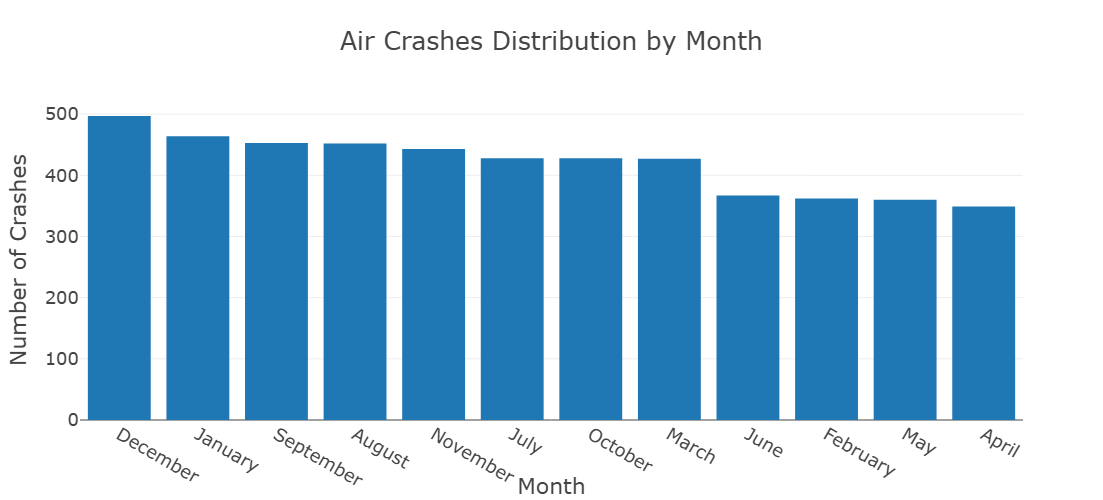

In [126]:
import calendar
import plotly.express as px
import os

# Count crashes per month number
crashes_by_month = df['Month_num'].value_counts().reset_index()
crashes_by_month.columns = ['Month_num', 'Crash Count']

# Add month name column
crashes_by_month['Month'] = crashes_by_month['Month_num'].apply(
    lambda x: calendar.month_name[int(x)] if x != 0 else 'Unknown'
)

# Sort by Crash Count descending
crashes_by_month = crashes_by_month.sort_values('Crash Count', ascending=False)

# Create bar chart with months ordered by descending crash count
fig = px.bar(
    crashes_by_month,
    x='Month',
    y='Crash Count',
    title='Air Crashes Distribution by Month ',
    template='presentation',
    height=500,
    category_orders={'Month': crashes_by_month['Month'].tolist()}  # order by crash count descending
)

fig.update_layout(
    xaxis_title='Month',
    yaxis_title='Number of Crashes'
)

fig.show()

# Save files
fig.write_image(os.path.join(result_dir, 'Air Crashes Distribution by Month Descending.jpg'))
fig.write_image(os.path.join(result_dir, 'Air Crashes Distribution by Month Descending.png'))
fig.write_html(os.path.join(result_dir, 'Air Crashes Distribution by Month Descending.html'))

This bar chart visualizes the distribution of air crashes across the months of the year, ordered by the number of crashes from highest to lowest. Instead of following the calendar sequence, the months are arranged so that the month with the most air crashes appears first on the left, descending to the month with the fewest crashes on the right.

From this visualization, we can quickly identify which months experienced the highest frequency of air crashes. This order helps highlight peak periods of air crash incidents, making it easier to analyze any seasonal trends or external factors influencing crash occurrences.

Understanding these peaks is crucial for improving aviation safety measures, allocating resources for risk management, and planning preventative actions during high-risk periods.